In [3]:
import glob
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Replay

In [7]:
results = "../nextflow/results/latest"

def gc_key(file):
    PR_str = file.split("/")[-2].split("-")
    return int(PR_str[1]), PR_str[3] + "-" + PR_str[2]

files = sorted(glob.glob(f"{results}/gctrees/PR*/gctree.p"), key=gc_key)
trees = {"_".join(f"{x}{y}" for x, y in zip(("mouse", "GC"), gc_key(file))): pickle.load(open(file, "rb"))
         for file in files}

print(f"loaded {len(trees)} GC trees")

loaded 95 GC trees


In [8]:
dat = []
for gc, tree in trees.items():
#     if gc.startswith("mouse7") or gc.startswith("mouse8"):
#         print(f"excluding 10-week mouse {gc}")
#     else:
        for node in tree.tree.traverse():
#             if node.abundance:
                dat.append([gc, node.name, len(node.mutations), ",".join(node.mutations), node.delta_bind_CGG_FVS_additive])
    
df = pd.DataFrame(dat, columns=("GC", "seq_id", "number of AA mutations", "mutations", "additive affinity effects"))
df

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
0,mouse1_GC1-RP,naive,0,,0.00000
1,mouse1_GC1-RP,seq37,3,"Y103(H)F,S20(L)N,L116(L)P",-0.06082
2,mouse1_GC1-RP,seq47,9,"E51(H)G,Y52(H)F,Y66(L)N,V71(L)I,D74(L)A,Q95(L)...",-3.45668
3,mouse1_GC1-RP,seq56,1,Y58(H)D,-0.80796
4,mouse1_GC1-RP,1,4,"N40(H)H,N108(L)D,Y114(L)S,E125(L)Q",-7.71074
...,...,...,...,...,...
7571,mouse12_GC130-LA,seq24,8,"S57(H)N,G63(H)D,A105(H)G,F115(H)L,V117(H)I,K9(...",0.76981
7572,mouse12_GC130-LA,seq43,6,"A105(H)G,F115(H)L,K9(L)E,Y55(L)*,N108(L)K,S109...",NaN
7573,mouse12_GC130-LA,seq23,6,"D81(H)A,A105(H)G,F115(H)L,K9(L)E,N108(L)K,S109...",1.21465
7574,mouse12_GC130-LA,seq20,7,"N48(H)S,A105(H)G,F115(H)L,K9(L)E,N108(L)K,S109...",0.93495


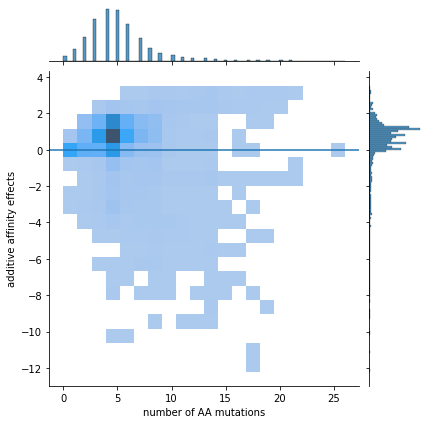

In [9]:
g = sns.jointplot(data=df, x="number of AA mutations", y="additive affinity effects", kind="hist", joint_kws=dict(bins=20))
g.ax_joint.axhline(0)
plt.show()

## DMS

In [10]:
dms_df = pd.read_csv("https://media.githubusercontent.com/media/jbloomlab/Ab-CGGnaive_DMS/main/results/final_variant_scores/final_variant_scores.csv", index_col="mutation", dtype=dict(position_IMGT=pd.Int16Dtype()))
# remove linker sites
dms_df = dms_df[dms_df.chain != "link"]
# add indicator for wildtype data
dms_df["WT"] = dms_df.wildtype == dms_df.mutant
assert dms_df.position_IMGT.max() < 1000
dms_df["site"] = [f"{chain}-{str(pos).zfill(3)}" for chain, pos in zip(dms_df.chain, dms_df.position_IMGT)]
dms_df

,target,wildtype,position,position_IMGT,chain,annotation,mutant,codon,single_nt,bind_CGG,...,expr,delta_expr,n_bc_expr,n_libs_expr,psr,delta_psr,n_bc_psr,n_libs_psr,WT,site
mutation,,,,,,,,,,,,,,,,,,,,,
E1(H)A,CGG_naive,E,1,1,H,FWRH1,A,GAG,True,10.48829,...,10.44614,-0.00453,19.0,2.0,6.78608,-0.07452,17.0,2.0,False,H-001
E1(H)C,CGG_naive,E,1,1,H,FWRH1,C,GAG,False,10.44477,...,10.32364,-0.12703,20.0,2.0,7.44234,0.58174,17.0,2.0,False,H-001
E1(H)D,CGG_naive,E,1,1,H,FWRH1,D,GAG,True,10.42771,...,10.51618,0.06551,16.0,2.0,6.95940,0.09880,13.0,2.0,False,H-001
E1(H)E,CGG_naive,E,1,1,H,FWRH1,E,GAG,True,10.45719,...,10.45067,0.00000,21170.0,2.0,6.86060,0.00000,18910.0,2.0,True,H-001
E1(H)F,CGG_naive,E,1,1,H,FWRH1,F,GAG,False,10.51899,...,10.33163,-0.11904,24.0,2.0,6.91372,0.05313,21.0,2.0,False,H-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R128(L)S,CGG_naive,R,235,128,L,FWRL4,S,CGT,True,10.44756,...,10.54313,0.09246,39.0,2.0,6.93925,0.07866,33.0,2.0,False,L-128
R128(L)T,CGG_naive,R,235,128,L,FWRL4,T,CGT,False,10.43023,...,10.53860,0.08793,36.0,2.0,6.88956,0.02896,34.0,2.0,False,L-128
R128(L)V,CGG_naive,R,235,128,L,FWRL4,V,CGT,False,10.38231,...,10.48707,0.03640,27.0,2.0,6.78160,-0.07899,24.0,2.0,False,L-128


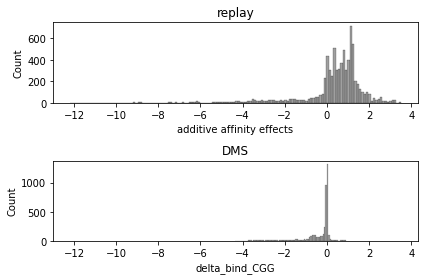

In [11]:
plt.subplot(211)
ax = sns.histplot(data=df, x="additive affinity effects", color="grey")
plt.title("replay")
plt.subplot(212, sharex=ax)
sns.histplot(data=dms_df, x="delta_bind_CGG", color="grey")
plt.title("DMS")
plt.tight_layout()
plt.show()

In [12]:
quantiles = df["additive affinity effects"].quantile(np.linspace(0, 1, 30))
quantiles

0.000000   -12.195310
0.034483    -3.534200
0.068966    -2.149653
0.103448    -1.124542
0.137931    -0.377452
0.172414    -0.069339
0.206897     0.000000
0.241379     0.065520
0.275862     0.162258
0.310345     0.278890
0.344828     0.331000
0.379310     0.379717
0.413793     0.502688
0.448276     0.563550
0.482759     0.672051
0.517241     0.745220
0.551724     0.812848
0.586207     0.862301
0.620690     0.955822
0.655172     1.043264
0.689655     1.091740
0.724138     1.148042
0.758621     1.186660
0.793103     1.205454
0.827586     1.249860
0.862069     1.369780
0.896552     1.525093
0.931034     1.795706
0.965517     2.191660
1.000000     3.517890
Name: additive affinity effects, dtype: float64

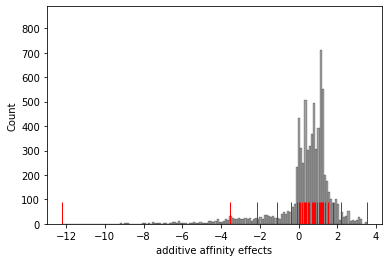

In [13]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(x=quantiles, height=0.1, color="red")
plt.show()

In [14]:
idxs = []

for q in quantiles:
    closest = np.inf
    for i in range(len(df)):
        delta = abs(df.loc[i, "additive affinity effects"] - q)
        if delta < closest:
            closest = delta
            closest_i = i
    idxs.append(closest_i)

df.loc[idxs].to_csv("~/Downloads/quantile_design.csv")
df.loc[idxs]

,GC,seq_id,number of AA mutations,mutations,additive affinity effects
6022,mouse8_GC87-LI,seq48,18,"I30(H)V,T35(H)S,F45(H)I,L50(H)F,Y52(H)F,M53(H)...",-12.19531
2151,mouse2_GC29-RB,seq43,5,"S29(H)P,A105(H)G,R106(H)S,F115(H)L,T90(L)A",-3.53641
6850,mouse11_GC122-LA,seq49,7,"D28(H)A,K44(H)Q,T95(H)A,A105(H)R,S56(L)A,N93(L...",-2.14806
5706,mouse8_GC84-RP,15,12,"N40(H)S,S59(H)G,Y67(H)H,T96(H)P,T37(L)S,K45(L)...",-1.12418
1410,mouse1_GC6-LP,seq25,6,"T96(H)S,Y103(H)F,K9(L)R,N28(L)I,Y42(L)H,L116(L)P",-0.37899
3146,mouse3_GC46-LP,seq61,2,"N93(L)S,L116(L)P",-0.06911
0,mouse1_GC1-RP,naive,0,,0.00000
6361,mouse11_GC113-LP,seq17,7,"M53(H)L,S59(H)T,G63(H)N,A105(H)G,N28(L)S,D74(L...",0.06552
3243,mouse3_GC55-RB,16,3,"I76(H)F,Y103(H)F,Y42(L)N",0.16205
7367,mouse12_GC128-LB,10,4,"T65(H)P,G36(L)R,Q105(L)H,L116(L)V",0.27889


## Tatsuya's designs

final design choices

In [15]:
df_designed = pd.read_csv("220331.2_Variants_to_produce.csv")
df_designed.Category = df_designed.Category.str.split(":").str[0].str.replace('"', "").str.replace("mouse 1", "").str.replace("mouse 2", "")
df_designed

,Fab #,Category,PR,HK_key_mouse,HK_key_node,HK_key_gc,HK_key_cell_type,name,parent_name,abundance,...,IgK_nt_sequence,IgK_aa_sequence,delta_bind,delta_expr,delta_psr,LC_prefix_twist,LC_insert_twist,HC_prefix_twist,HC_suffix_twist,HC_insert_twist
0,1,Uniform ladder,PR1.6,8.0,LI,87.0,GC,seq46,51,1.0,...,GACATTGTGATGACTCAGTCTCAAGAATTCATGTCCACGTCAGTAG...,DIVMTQSQEFMSTSVGDRVSVTCKASQNVGTDVAWYQQKPGQSPKA...,-12.19531,-0.69039,2.17393,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAGAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
1,2,Uniform ladder,PR1.5,8.0,LP,85.0,GC,seq36,11,2.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWFQQKPGHSPKA...,-9.15380,-0.97991,2.38985,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
2,3,Uniform ladder,PR1.7,2.0,RB,28.0,GC,seq35,18,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,-7.52469,-0.55500,0.84990,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
3,4,Uniform ladder,PR1.5,8.0,RI,86.0,GC,seq6,seq35,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVETNVAWFQQKPGQSPKA...,-5.32024,-0.73088,2.19250,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
4,5,Uniform ladder,PR1.2,4.0,LI,73.0,GC,seq32,26,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWNQQKPGQSPKA...,-3.07380,-1.33981,0.57563,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
5,6,Uniform ladder,PR1.3,3.0,LP,46.0,GC,seq51,seq23,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGINVAWYQQKPGQSPKA...,-1.41357,-1.84166,0.87274,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
6,7,Uniform ladder,PR1.7,1.0,RB,12.0,GC,seq21,3,1.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGTAG...,DIVMTQSQKFMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,1.50696,0.11229,0.16275,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
7,8,Uniform ladder,PR1.6,8.0,RP,84.0,GC,seq62,seq40,1.0,...,GACATTGTAATGACTCAGTCTCAAAAATTCATGTCCACATCAGAAG...,DIVMTQSQKFMSTSEGDRVSVTCKASQDVGTNVAWYQEKPGQSPKA...,2.19166,-0.08753,0.72645,GTACATTCC,GTACATTCCGACATTGTAATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
8,9,Uniform ladder,PR1.5,8.0,LB,89.0,GC,seq67,40,1.0,...,GACATTGTGATGACTCAGTCTCAAAAACTCATGTCCACATCAGTAG...,DIVMTQSQKLMSTSVGDRVSVTCKASQNVGTNVAWYQQKPGQSPKA...,2.70218,0.05960,-0.10394,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAACTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...
9,10,Uniform ladder,PR1.5,8.0,RI,86.0,GC,18,53,0.0,...,GACATTGTGATGACTCAGTCTCAAAAATTCATGTCCACATCAGCAG...,DIVMTQSQKFMSTSAGDRVSVTCKASQNVGTNVGWYQQKPGQSPKA...,3.51789,0.28299,-0.06213,GTACATTCC,GTACATTCCGACATTGTGATGACTCAGTCTCAAAAATTCATGTCCA...,GTACATTCC,GC,GTACATTCCGAGGTGCAGCTTCAGGAGTCAGGACCTAGCCTCGTGA...


Note: High potential are missing phenotype info

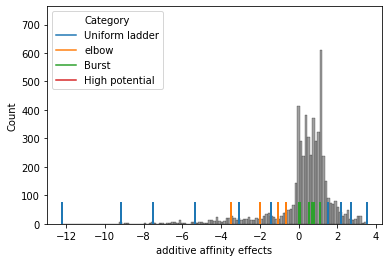

In [13]:
sns.histplot(data=df, x="additive affinity effects", color="grey")
sns.rugplot(data=df_designed, x="delta_bind", hue="Category", height=0.1, lw=2)
plt.show()